# 卷积神经网络
+ layers.Conv2D()
    + layers.kernel
    + layers.bias
+ lagers.call(x):当layer的callmethod被调用时，layer才实际存在，此时将传入input_shape。如果call没有被调用，此时layer中并没有input_shape的信息
+ out = tf.nn.conv2d(x, w, strides=1, padding='VALID')：其中w其实是layers.kernel.shape

## layers.Conv2D()
+ filters(过滤器)--default：影响数据最后一个维度值
+ kernel_size ：表示卷积核的大小，可以直接写一个数，影响的是输出结果前两个数据的维度
+ strides  步长 同样会影响输出的前两个维度，例如，(600, 600, 3）=> (300, 300, 64)，值得注意的是，括号里的数据可以不一致，分别控制横坐标和纵坐标
+ padding 是否对周围进行填充，“same” 即使通过kernel_size 缩小了维度，但是四周会填充 0，保持原先的维度；“valid”表示存储不为0的有效信息。

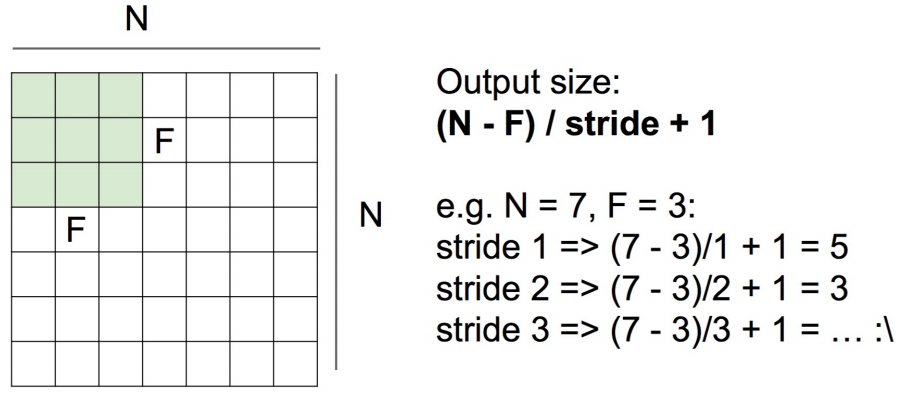

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

In [6]:
x = tf.random.normal([1,32,32,3])

In [9]:
# padding='valid'：输入和输出维度不同
layer = layers.Conv2D(4, kernel_size=5, strides=1, padding='valid')
out = layer(x)
out.shape


TensorShape([1, 28, 28, 4])

In [10]:
# padding='same'：输入和输出维度相同
layer = layers.Conv2D(4, kernel_size=5, strides=1, padding='same')
out = layer(x)
out.shape

TensorShape([1, 32, 32, 4])

In [11]:
layer.call(x).shape

TensorShape([1, 32, 32, 4])

## weight & bias

In [12]:
layer = layers.Conv2D(4, kernel_size=5, strides=2, padding='same')
out = layer(x)
out.shape

TensorShape([1, 16, 16, 4])

In [13]:
# 5，5--》size，3--》通道数，4--》核数量
layer.kernel.shape

TensorShape([5, 5, 3, 4])

In [15]:
layer.bias

<tf.Variable 'conv2d_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>

## nn.conv2d

In [17]:
w = tf.random.normal([5, 5, 3, 4])
b = tf.zeros([4])
x.shape

TensorShape([1, 32, 32, 3])

In [20]:
out = tf.nn.conv2d(x, w, strides=1, padding='VALID')
out.shape

TensorShape([1, 28, 28, 4])

In [21]:
#属性并没有改变
out = out + b
out.shape

TensorShape([1, 28, 28, 4])

# 池化与采样
+ layers.MaxPool2D(2, strides=2)

## subsample

In [ ]:
x = tf.random.normal([1, 14, 14, 4])

pool = layers.MaxPool2D(2, strides=2)
out = pool(x)
out.shape
